In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import faraday as fd

#%matplotlib notebook

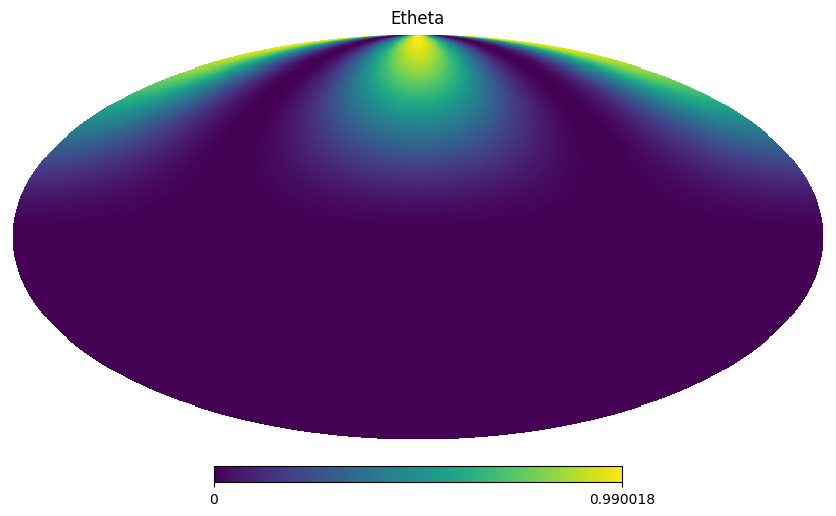

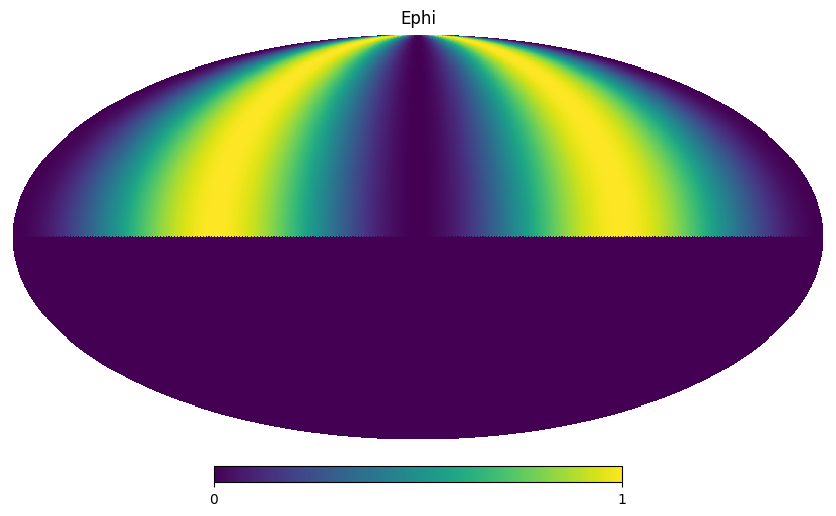

In [2]:
FREQ = 30  # MHz
NSIDE = 128

beam = fd.ShortDipole(NSIDE, frequency=FREQ)
hp.mollview(beam.beam_X[0]**2, title="Etheta")
plt.show()
hp.mollview(beam.beam_X[1]**2, title="Ephi")
plt.show()

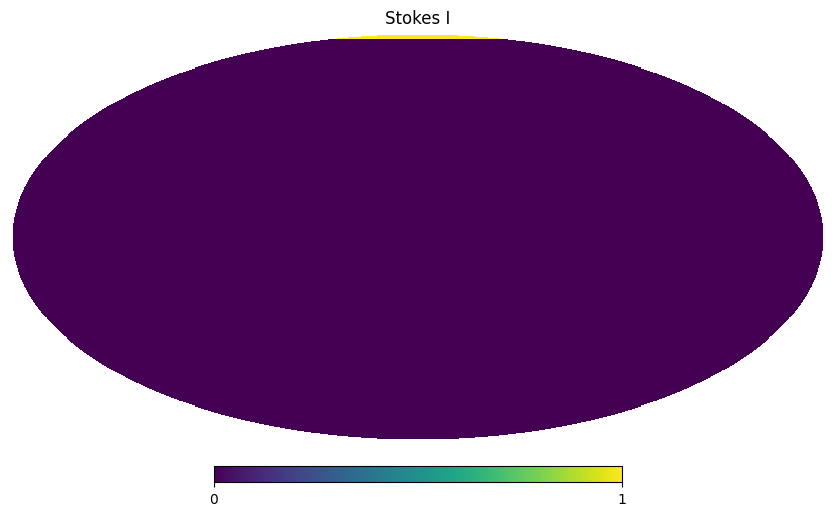

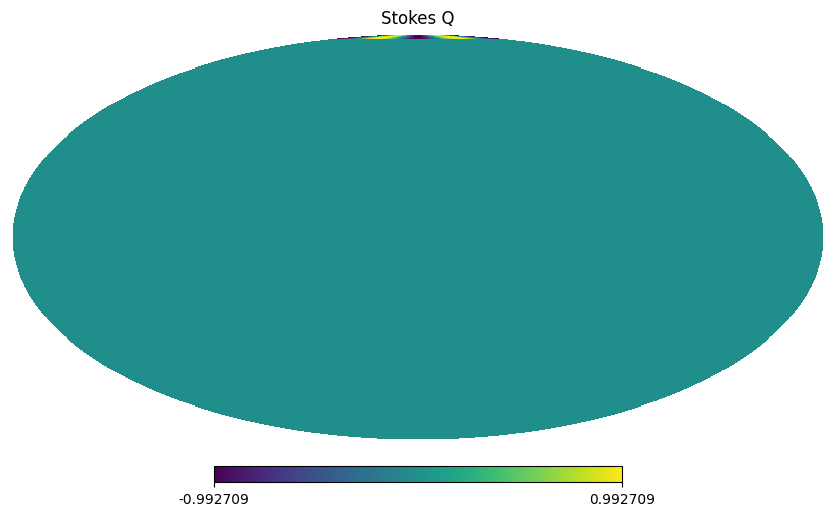

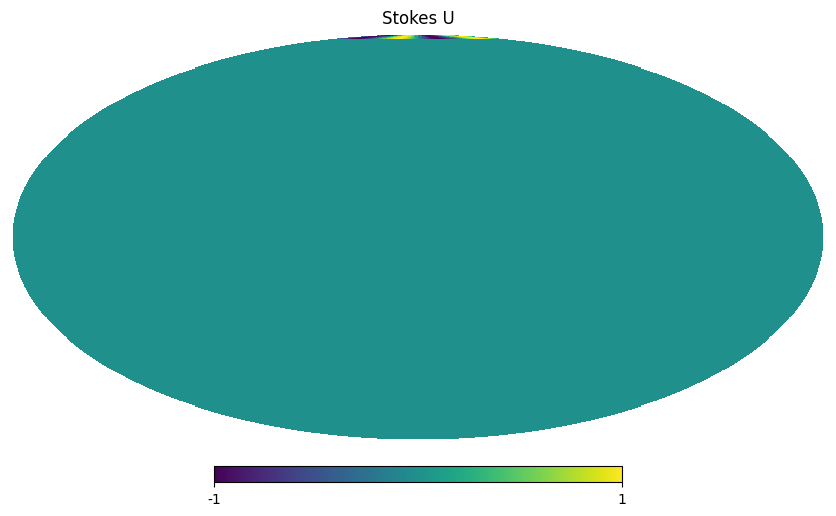

In [3]:
sky = fd.Sky.zeros(NSIDE, freq=FREQ)
sky.add_point_source(extent=5)  # 5 deg source at zenith
hp.mollview(sky.stokes[0, 0], title="Stokes I")
plt.show()
hp.mollview(sky.stokes[0, 1], title="Stokes Q")
plt.show()
hp.mollview(sky.stokes[0, 2], title="Stokes U")
plt.show()

In [4]:
sky.del_zeros()

IndexError: too many indices for array: array is 3-dimensional, but 4 were indexed

In [7]:
np.shape(sky.stokes[:, 0] != 0

array([[ True,  True,  True, ..., False, False, False]])

In [6]:
sky.stokes.shape

(1, 3, 196608)

In [ ]:
frequencies = np.linspace(0, 0.25*64, 64*64) + FREQ  # 64 channels of width 0.25 MHz = 250 kHz
sky.power_law(frequencies, -2.5)

In [ ]:
plt.figure()
plt.plot(sky.stokes[:, 0, 10], label="Stokes I")
plt.plot(sky.stokes[:, 1, 10], label="Stokes Q")
plt.plot(sky.stokes[:, 2, 10], label="Stokes U")
plt.legend()
plt.show()

In [ ]:
RM = 250
sky.apply_faraday(250)

plt.figure()
plt.plot(sky.stokes_rot[:, 0, 10], label="Stokes I")
plt.plot(sky.stokes_rot[:, 1, 10], label="Stokes Q")
plt.plot(sky.stokes_rot[:, 2, 10], label="Stokes U")
plt.plot(np.sqrt(sky.stokes_rot[:, 1, 10]**2 + sky.stokes_rot[:, 2, 10]**2))
plt.legend()
plt.show()